<a href="https://colab.research.google.com/github/543877815/KDEF/blob/master/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## google colab 磁盘挂载和位置调整

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
cd drive/My\ Drive/KDEF

# 程序开始

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
base_dir = 'data/KDEF_and_AKDEF/KDEF/'

In [3]:
import os
# 显示几个随机增强后的训练图像
from keras.preprocessing import image 

In [4]:
# 将文件名读入list中
def read(filename):
    data = []
    file = open(filename, 'r')
    for line in file:
        data.append(line.replace('\n',''))
    file.close()
    return data

In [5]:
training_data = read('data/train.txt')
test_data = read('data/test.txt')
validation_data = read('data/validation.txt')

In [6]:
len(training_data), len(test_data), len(validation_data)

(2900, 1000, 1000)

In [7]:
import numpy as np
# 从文本中提取数据出来
def process(data):
    path = [item.split(',')[0] for item in data]
    expression = [int(item.split(',')[1]) for item in data]
    angle = [int(item.split(',')[2]) for item in data]
    return path, expression, angle

# one-hot 编码
def to_one_hot(labels, dimension=1):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [8]:
training_path, training_expression, training_angle = process(training_data)
test_path, test_expression, test_angle = process(test_data)
validation_path, validation_expression, validation_angle = process(validation_data)

## 可视化aumentation图片

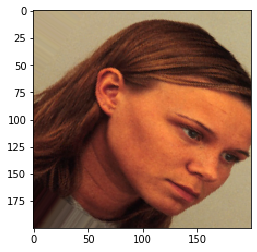

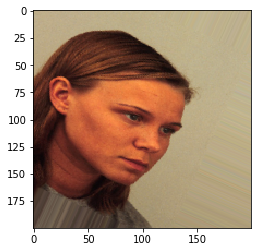

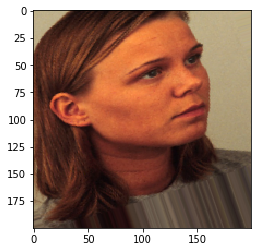

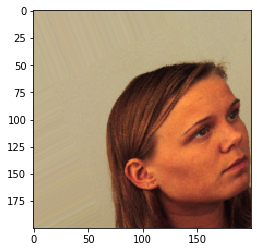

In [9]:
# 可视化data augmentation图片
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(      
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')


img = image.load_img(base_dir + training_path[0], target_size=(200, 200)) # 读取图像并调整大小

x = image.img_to_array(img) # 将其转化为(img.size[0], img.size[1], 3)的Numpy数组

x = x.reshape((1,) + x.shape) # 将其转化为(1, img.size[0], img.size[1], 3)的Numpy

import matplotlib.pyplot as plt

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()
    

## 将表情图片分放

In [10]:
# 将数据分放
data_dir = 'data/expression/'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

label_range = np.unique(training_expression)

# training data dictionary
expression_train_dir = os.path.join(data_dir, 'train')
if not os.path.exists(expression_train_dir):
    os.mkdir(expression_train_dir)
    for i in label_range:
        train_i_dir = os.path.join(expression_train_dir, str(i))
        if not os.path.exists(train_i_dir):
            os.mkdir(train_i_dir)
            
# test data dictionary
expression_test_dir = os.path.join(data_dir, 'test')
if not os.path.exists(expression_test_dir):
    os.mkdir(expression_test_dir)
    for i in label_range:
        test_i_dir = os.path.join(expression_test_dir, str(i))
        if not os.path.exists(test_i_dir):
            os.mkdir(test_i_dir)
            
# validation data dictionary
expression_validation_dir = os.path.join(data_dir, 'validation')
if not os.path.exists(expression_validation_dir):
    os.mkdir(expression_validation_dir)
    for i in label_range:
        validation_i_dir = os.path.join(expression_validation_dir, str(i))
        if not os.path.exists(validation_i_dir):
            os.mkdir(validation_i_dir)

In [11]:
# copy file to the dictionary
import shutil
from tqdm import tqdm

# training data copy
for path, expression in tqdm(zip(training_path, training_expression)):
    file = path.split('/')[1]
    src = os.path.join(base_dir, path)
    dst = os.path.join(expression_train_dir, str(expression), file)
    shutil.copyfile(src, dst)

# test data copy
for path, expression in tqdm(zip(test_path, test_expression)):
    file = path.split('/')[1]
    src = os.path.join(base_dir, path)
    dst = os.path.join(expression_test_dir, str(expression), file)
    shutil.copyfile(src, dst)
    
for path, expression in tqdm(zip(validation_path, validation_expression)):
    file = path.split('/')[1]
    src = os.path.join(base_dir, path)
    dst = os.path.join(expression_validation_dir, str(expression), file)
    shutil.copyfile(src, dst)

2900it [00:02, 1103.37it/s]
1000it [00:00, 1098.04it/s]
1000it [00:00, 1147.54it/s]


## 将角度图片分放

In [12]:
# 将数据分放
data_dir = 'data/angle/'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

label_range = np.unique(training_angle)

# training data dictionary
angle_train_dir = os.path.join(data_dir, 'train')
if not os.path.exists(angle_train_dir):
    os.mkdir(angle_train_dir)
    for i in label_range:
        train_i_dir = os.path.join(angle_train_dir, str(i))
        if not os.path.exists(train_i_dir):
            os.mkdir(train_i_dir)
            
# test data dictionary
angle_test_dir = os.path.join(data_dir, 'test')
if not os.path.exists(angle_test_dir):
    os.mkdir(angle_test_dir)
    for i in label_range:
        test_i_dir = os.path.join(angle_test_dir, str(i))
        if not os.path.exists(test_i_dir):
            os.mkdir(test_i_dir)
            
# validation data dictionary
angle_validation_dir = os.path.join(data_dir, 'validation')
if not os.path.exists(angle_validation_dir):
    os.mkdir(angle_validation_dir)
    for i in label_range:
        validation_i_dir = os.path.join(angle_validation_dir, str(i))
        if not os.path.exists(validation_i_dir):
            os.mkdir(validation_i_dir)

In [13]:
# copy file to the dictionary
import shutil
from tqdm import tqdm

# training data copy
for path, angle in tqdm(zip(training_path, training_angle)):
    file = path.split('/')[1]
    src = os.path.join(base_dir, path)
    dst = os.path.join(angle_train_dir, str(angle), file)
    shutil.copyfile(src, dst)

# test data copy
for path, angle in tqdm(zip(test_path, test_angle)):
    file = path.split('/')[1]
    src = os.path.join(base_dir, path)
    dst = os.path.join(angle_test_dir, str(angle), file)
    shutil.copyfile(src, dst)
    
for path, angle in tqdm(zip(validation_path, validation_angle)):
    file = path.split('/')[1]
    src = os.path.join(base_dir, path)
    dst = os.path.join(angle_validation_dir, str(angle), file)
    shutil.copyfile(src, dst)

2900it [00:00, 2922.21it/s]
1000it [00:00, 3158.97it/s]
1000it [00:00, 3073.58it/s]


## 预训练模型作特征提取

In [14]:
# 引入预训练模型
from keras.applications import  ResNet50
conv_base = ResNet50(include_top=False, 
            weights='imagenet',
            input_shape=(224, 224, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [15]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

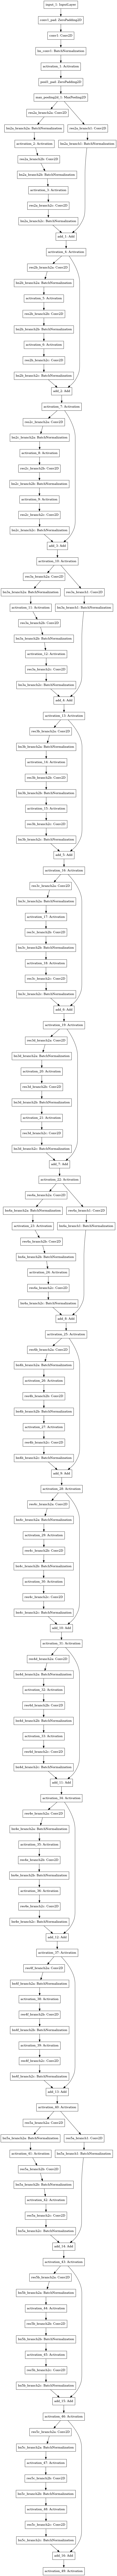

In [16]:
from keras.utils import plot_model
plot_model(conv_base, to_file='model.png')

In [17]:
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 2048))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in tqdm(generator):
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            #注意，这些生成器在循环中不断生成数据，所以你必须在读取完所有图像后终止循环
            break
    return features, labels

expression_train_features, expression_train_labels = extract_features(expression_train_dir, 2900)
expression_validation_features, expression_validation_labels = extract_features(expression_validation_dir, 1000)
expression_test_features, expression_test_labels = extract_features(expression_test_dir, 1000)

  0%|          | 0/145 [00:00<?, ?it/s]

Found 2900 images belonging to 7 classes.


  0%|          | 0/50 [00:00<?, ?it/s]

Found 1000 images belonging to 7 classes.



 98%|█████████▊| 49/50 [00:21<00:00,  2.28it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Found 1000 images belonging to 7 classes.




  2%|▏         | 1/50 [00:00<00:22,  2.22it/s]

  4%|▍         | 2/50 [00:00<00:21,  2.24it/s]

  6%|▌         | 3/50 [00:01<00:20,  2.25it/s]

  8%|▊         | 4/50 [00:01<00:20,  2.25it/s]

 10%|█         | 5/50 [00:02<00:19,  2.26it/s]

 12%|█▏        | 6/50 [00:02<00:19,  2.26it/s]

 14%|█▍        | 7/50 [00:03<00:18,  2.27it/s]

 16%|█▌        | 8/50 [00:03<00:18,  2.27it/s]

 18%|█▊        | 9/50 [00:03<00:18,  2.27it/s]

 20%|██        | 10/50 [00:04<00:18,  2.17it/s]

 22%|██▏       | 11/50 [00:04<00:17,  2.17it/s]

 24%|██▍       | 12/50 [00:05<00:17,  2.19it/s]

 26%|██▌       | 13/50 [00:05<00:16,  2.21it/s]

 28%|██▊       | 14/50 [00:06<00:16,  2.22it/s]

 30%|███       | 15/50 [00:06<00:15,  2.24it/s]

 32%|███▏      | 16/50 [00:07<00:15,  2.23it/s]

 34%|███▍      | 17/50 [00:07<00:14,  2.22it/s]

 36%|███▌      | 18/50 [00:08<00:14,  2.24it/s]

 38%|███▊      | 19/50 [00:08<00:13,  2.25it/s]

 40%|████      | 20/50 [00:08<00:13,  2.25it/s]

 42%|████▏     | 21/50 [00:

In [19]:
expression_train_features.shape, expression_train_labels.shape

((2900, 7, 7, 2048), (2900,))

In [18]:
angle_train_features, angle_train_labels = extract_features(angle_train_dir, 2900)
angle_validation_features, angle_validation_labels = extract_features(angle_validation_dir, 1000)
angle_test_features, angle_test_labels = extract_features(angle_test_dir, 1000)




  0%|          | 0/145 [00:00<?, ?it/s]

Found 2900 images belonging to 5 classes.





  1%|          | 1/145 [00:00<01:06,  2.16it/s]


  1%|▏         | 2/145 [00:00<01:05,  2.19it/s]


  2%|▏         | 3/145 [00:01<01:04,  2.21it/s]


  3%|▎         | 4/145 [00:01<01:03,  2.22it/s]


  3%|▎         | 5/145 [00:02<01:02,  2.24it/s]


  4%|▍         | 6/145 [00:02<01:02,  2.24it/s]


  5%|▍         | 7/145 [00:03<01:01,  2.24it/s]


  6%|▌         | 8/145 [00:03<01:00,  2.26it/s]


  6%|▌         | 9/145 [00:04<01:00,  2.26it/s]


  7%|▋         | 10/145 [00:04<00:59,  2.25it/s]


  8%|▊         | 11/145 [00:04<00:59,  2.26it/s]


  8%|▊         | 12/145 [00:05<00:58,  2.26it/s]


  9%|▉         | 13/145 [00:05<00:58,  2.25it/s]


 10%|▉         | 14/145 [00:06<00:58,  2.25it/s]


 10%|█         | 15/145 [00:06<00:57,  2.26it/s]


 11%|█         | 16/145 [00:07<00:57,  2.23it/s]


 12%|█▏        | 17/145 [00:07<00:57,  2.23it/s]


 12%|█▏        | 18/145 [00:08<00:56,  2.25it/s]


 13%|█▎        | 19/145 [00:08<00:56,  2.25it/s]


 14%|█▍        | 20/145 [00:08<00:55,

 94%|█████████▍| 137/145 [01:01<00:03,  2.22it/s]


 95%|█████████▌| 138/145 [01:01<00:03,  2.20it/s]


 96%|█████████▌| 139/145 [01:02<00:02,  2.20it/s]


 97%|█████████▋| 140/145 [01:02<00:02,  2.20it/s]


 97%|█████████▋| 141/145 [01:02<00:01,  2.20it/s]


 98%|█████████▊| 142/145 [01:03<00:01,  2.15it/s]


 99%|█████████▊| 143/145 [01:03<00:00,  2.18it/s]


 99%|█████████▉| 144/145 [01:04<00:00,  2.18it/s]



  0%|          | 0/50 [00:00<?, ?it/s]

Found 1000 images belonging to 5 classes.






  2%|▏         | 1/50 [00:00<00:23,  2.10it/s]



  4%|▍         | 2/50 [00:00<00:22,  2.13it/s]



  6%|▌         | 3/50 [00:01<00:22,  2.12it/s]



  8%|▊         | 4/50 [00:01<00:21,  2.13it/s]



 10%|█         | 5/50 [00:02<00:20,  2.16it/s]



 12%|█▏        | 6/50 [00:02<00:20,  2.20it/s]



 14%|█▍        | 7/50 [00:03<00:19,  2.21it/s]



 16%|█▌        | 8/50 [00:03<00:18,  2.21it/s]



 18%|█▊        | 9/50 [00:04<00:18,  2.16it/s]



 20%|██        | 10/50 [00:04<00:18,  2.18it/s]



 22%|██▏       | 11/50 [00:05<00:17,  2.20it/s]



 24%|██▍       | 12/50 [00:05<00:17,  2.21it/s]



 26%|██▌       | 13/50 [00:05<00:16,  2.23it/s]



 28%|██▊       | 14/50 [00:06<00:16,  2.22it/s]



 30%|███       | 15/50 [00:06<00:15,  2.22it/s]



 32%|███▏      | 16/50 [00:07<00:15,  2.20it/s]



 34%|███▍      | 17/50 [00:07<00:14,  2.21it/s]



 36%|███▌      | 18/50 [00:08<00:14,  2.22it/s]



 38%|███▊      | 19/50 [00:08<00:13,  2.23it/s]



 40%|████      | 20/50 [00:09<00:13,

Found 1000 images belonging to 5 classes.







  2%|▏         | 1/50 [00:00<00:23,  2.10it/s]




  4%|▍         | 2/50 [00:00<00:22,  2.13it/s]




  6%|▌         | 3/50 [00:01<00:22,  2.12it/s]




  8%|▊         | 4/50 [00:01<00:21,  2.16it/s]




 10%|█         | 5/50 [00:02<00:20,  2.18it/s]




 12%|█▏        | 6/50 [00:02<00:20,  2.19it/s]




 14%|█▍        | 7/50 [00:03<00:19,  2.16it/s]




 16%|█▌        | 8/50 [00:03<00:19,  2.17it/s]




 18%|█▊        | 9/50 [00:04<00:18,  2.18it/s]




 20%|██        | 10/50 [00:04<00:18,  2.14it/s]




 22%|██▏       | 11/50 [00:05<00:18,  2.12it/s]




 24%|██▍       | 12/50 [00:05<00:17,  2.14it/s]




 26%|██▌       | 13/50 [00:06<00:17,  2.17it/s]




 28%|██▊       | 14/50 [00:06<00:16,  2.15it/s]




 30%|███       | 15/50 [00:06<00:16,  2.14it/s]




 32%|███▏      | 16/50 [00:07<00:15,  2.15it/s]




 34%|███▍      | 17/50 [00:07<00:15,  2.19it/s]




 36%|███▌      | 18/50 [00:08<00:14,  2.22it/s]




 38%|███▊      | 19/50 [00:08<00:13,  2.24it/s]




 40%|████      |

In [20]:
angle_train_features.shape, angle_train_labels.shape

((2900, 7, 7, 2048), (2900,))

In [22]:
expression_train_features = np.reshape(expression_train_features, (2900, 7 * 7 * 2048))
expression_validation_features = np.reshape(expression_validation_features, (1000, 7 * 7 * 2048))
expression_test_features = np.reshape(expression_test_features, (1000, 7 * 7 * 2048))

angle_train_features = np.reshape(angle_train_features, (2900, 7 * 7 * 2048))
angle_validation_features = np.reshape(angle_validation_features, (1000, 7 * 7 * 2048))
angle_test_features = np.reshape(angle_test_features, (1000, 7 * 7 * 2048))

In [23]:
# one_hot 编码
from keras.utils.np_utils import to_categorical

one_hot_expression_train_labels = to_categorical(expression_train_labels)
one_hot_expression_test_labels = to_categorical(expression_test_labels)
one_hot_expression_validation_labels = to_categorical(expression_validation_labels)

one_hot_angle_train_labels = to_categorical(angle_train_labels)
one_hot_angle_test_labels = to_categorical(angle_test_labels)
one_hot_angle_validation_labels = to_categorical(angle_validation_labels)

## 将提取出来的特征作为新的输入到一个新的神经网络中

In [38]:
from keras import models
from keras import layers
from keras import optimizers

input_tensor = layers.Input(shape=(7 * 7 * 2048,))
hidden_input = layers.Dense(512, activation='relu')(input_tensor)
hidden_input = layers.Dropout(0.5)(hidden_input)
output_input = layers.Dense(32, activation='relu')(hidden_input)
output_input = layers.Dropout(0.5)(output_input)
expression_output_tensor = layers.Dense(7, activation='sigmoid', name='expression_output_tensor')(input_tensor)
angle_output_tensor = layers.Dense(5, activation='sigmoid', name='angle_output_tensor')(input_tensor)

model = models.Model(inputs=input_tensor, outputs=[expression_output_tensor, angle_output_tensor])

losses = {'expression_output_tensor':'binary_crossentropy', 'angle_output_tensor':'binary_crossentropy'}

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss=losses,
              loss_weights=[1., 0.5],
              metrics=['acc'])

history = model.fit(expression_train_features,
                    {'expression_output_tensor': one_hot_expression_train_labels, 'angle_output_tensor': one_hot_angle_train_labels},
                    epochs=10,
                    batch_size=20,
                    validation_data=(expression_validation_features, {'expression_output_tensor': one_hot_expression_validation_labels, 'angle_output_tensor': one_hot_angle_validation_labels}))

Train on 2900 samples, validate on 1000 samples
Epoch 1/10
2900/2900 [==============================] - 3s 1ms/step - loss: 0.6801 - expression_output_tensor_loss: 0.4214 - angle_output_tensor_loss: 0.5173 - expression_output_tensor_acc: 0.8509 - angle_output_tensor_acc: 0.7890 - val_loss: 0.6631 - val_expression_output_tensor_loss: 0.4118 - val_angle_output_tensor_loss: 0.5026 - val_expression_output_tensor_acc: 0.8571 - val_angle_output_tensor_acc: 0.8000
Epoch 2/10
2900/2900 [==============================] - 3s 905us/step - loss: 0.6659 - expression_output_tensor_loss: 0.4139 - angle_output_tensor_loss: 0.5040 - expression_output_tensor_acc: 0.8571 - angle_output_tensor_acc: 0.8000 - val_loss: 0.6650 - val_expression_output_tensor_loss: 0.4133 - val_angle_output_tensor_loss: 0.5034 - val_expression_output_tensor_acc: 0.8571 - val_angle_output_tensor_acc: 0.8000
Epoch 3/10
2900/2900 [==============================] - 2s 802us/step - loss: 0.6666 - expression_output_tensor_loss: 0.41

## 模型评估

In [37]:
result = model.evaluate(expression_test_features, {'expression_output_tensor': one_hot_expression_test_labels, 'angle_output_tensor': one_hot_angle_test_labels})
result

1000/1000 [==============================] - 0s 397us/step


[0.6694070749282837,
 0.4174237549304962,
 0.5032151937484741,
 0.8571429252624512,
 0.7999998331069946]

In [40]:
training_path

['AF19/AF19NEHR.JPG',
 'AM03/AM03DIFL.JPG',
 'AM34/AM34DIFL.JPG',
 'AM34/AM34HAS.JPG',
 'BM25/BM25ANHL.JPG',
 'AF29/AF29NES.JPG',
 'BF03/BF03NEFR.JPG',
 'BF01/BF01SUFL.JPG',
 'AM33/AM33SUS.JPG',
 'AM01/AM01DIS.JPG',
 'BM31/BM31AFHR.JPG',
 'AM20/AM20HAS.JPG',
 'AM26/AM26ANFR.JPG',
 'AF20/AF20SUHR.JPG',
 'BM01/BM01HAFR.JPG',
 'AM12/AM12SUS.JPG',
 'BM16/BM16AFS.JPG',
 'BM31/BM31DIS.JPG',
 'AM14/AM14HAFR.JPG',
 'BF08/BF08DIS.JPG',
 'BF25/BF25SAHR.JPG',
 'BF20/BF20NEHR.JPG',
 'BM15/BM15SUS.JPG',
 'BF07/BF07ANS.JPG',
 'AM18/AM18AFHL.JPG',
 'BF21/BF21NEFR.JPG',
 'BF07/BF07SAFL.JPG',
 'BF22/BF22SAFR.JPG',
 'BM14/BM14SUS.JPG',
 'BM11/BM11NEHL.JPG',
 'AM05/AM05HAHL.JPG',
 'BM18/BM18ANS.JPG',
 'BM34/BM34NEFL.JPG',
 'BF08/BF08DIHR.JPG',
 'BF12/BF12NEFR.JPG',
 'BM32/BM32DIFR.JPG',
 'AF33/AF33DIHL.JPG',
 'AF20/AF20AFS.JPG',
 'AM02/AM02SUHL.JPG',
 'BM04/BM04ANFR.JPG',
 'BM22/BM22DIFR.JPG',
 'BF19/BF19NEFR.JPG',
 'AM04/AM04ANS.JPG',
 'AF06/AF06AFHR.JPG',
 'BF12/BF12SAHL.JPG',
 'BM17/BM17NEHL.JPG',
 'A